<a href="https://colab.research.google.com/github/MorganHarrison4/Python-Code-Data-Analytics-2/blob/master/Project_Deliverable_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT DELIVERABLE I**

**Importing libraries**

In [ ]:
from sklearn.datasets import load_digits
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from google.colab import files
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import io
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [ ]:
uploaded = files.upload()

Saving Flowdata1.csv to Flowdata1.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()

Saving Flowdata2.csv to Flowdata2.csv


In [ ]:
df1 = pd.read_csv("Flowdata1.csv")
df1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32,120150.33330,52427.28445,180688,89766,1.000000e+07,13501.460620,10000000,9996190,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298754,443,194474,34,40,871,64624,389,0,25.617647,81.402857,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN
298755,80,46092941,8,9,461,2149,457,0,57.625000,161.372628,...,20,42679.75000,33231.66373,92319,21870,9.995370e+06,3530.318635,9998725,9991910,BENIGN
298756,443,65072602,12,13,3226,635,2652,0,268.833333,764.897121,...,20,37948.83333,37551.51029,114600,22492,9.997484e+06,25981.318330,10000000,9955973,BENIGN
298757,53,221,2,2,80,272,40,40,40.000000,0.000000,...,32,0.00000,0.00000,0,0,0.000000e+00,0.000000,0,0,BENIGN


In [ ]:
df2 = pd.read_csv("Flowdata2.csv")
df2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,23831,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0000,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN
1,80,16406177,5,7,730,11595,365,0,146.000000,199.918734,...,32,0.0000,0.000000,0,0,1.600000e+07,0.000000,16000000,16000000,DoS Hulk
2,80,45879923,6,5,36,0,6,6,6.000000,0.000000,...,20,23775.2500,61.424072,23840,23692,9.991468e+06,59.050826,9991546,9991403,BENIGN
3,80,85057374,12,7,1695,11595,339,0,141.250000,174.560812,...,32,983.0000,0.000000,983,983,8.330000e+07,0.000000,83300000,83300000,DoS Hulk
4,53,43444670,2,2,110,229,63,47,55.000000,11.313709,...,32,672.0000,0.000000,672,672,4.340000e+07,0.000000,43400000,43400000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464106,80,116095836,20,17,978,3922,444,0,48.900000,135.138876,...,20,144509.1818,378070.672600,1284413,29566,9.986925e+06,73585.534090,10000000,9769729,BENIGN
464107,80,85358052,7,6,349,11595,349,0,49.857143,131.909601,...,32,3.0000,0.000000,3,3,8.520000e+07,0.000000,85200000,85200000,DoS Hulk
464108,58511,193,2,1,280,6,274,6,140.000000,189.504617,...,20,0.0000,0.000000,0,0,0.000000e+00,0.000000,0,0,BENIGN
464109,80,7008,2,1,12,0,6,6,6.000000,0.000000,...,20,0.0000,0.000000,0,0,0.000000e+00,0.000000,0,0,DoS Hulk


As we were given two training data set with the exact variables, we decided to concatenate the two data frames vertically to create a new data frame:

In [ ]:
df=pd.concat([df1, df2])
data = df
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32,120150.3333,52427.28445,180688,89766,1.000000e+07,13501.46062,10000000,9996190,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464106,80,116095836,20,17,978,3922,444,0,48.900000,135.138876,...,20,144509.1818,378070.67260,1284413,29566,9.986925e+06,73585.53409,10000000,9769729,BENIGN
464107,80,85358052,7,6,349,11595,349,0,49.857143,131.909601,...,32,3.0000,0.00000,3,3,8.520000e+07,0.00000,85200000,85200000,DoS Hulk
464108,58511,193,2,1,280,6,274,6,140.000000,189.504617,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
464109,80,7008,2,1,12,0,6,6,6.000000,0.000000,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,DoS Hulk


**Data preprocessing (except scaling)**

As our training data set presented NaN values, we remove rows or columns that contain missing or undefined data. As well, we remove the Index column to have the exact 79 columns we had before in our concatenate table:

In [ ]:
data.dropna(inplace=True)

In [ ]:
data = data.reset_index(drop = True)
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,158776,8,5,493,3533,191,0,61.625000,78.770802,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
1,389,456,10,4,165,326,79,0,16.500000,33.012624,...,32,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
2,80,32368538,7,7,432,1389,432,0,61.714286,163.280652,...,32,120150.3333,52427.28445,180688,89766,1.000000e+07,13501.46062,10000000,9996190,BENIGN
3,443,3391963,11,11,999,3950,267,0,90.818182,96.624860,...,32,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
4,53,60559,1,1,64,117,64,64,64.000000,0.000000,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762060,80,116095836,20,17,978,3922,444,0,48.900000,135.138876,...,20,144509.1818,378070.67260,1284413,29566,9.986925e+06,73585.53409,10000000,9769729,BENIGN
762061,80,85358052,7,6,349,11595,349,0,49.857143,131.909601,...,32,3.0000,0.00000,3,3,8.520000e+07,0.00000,85200000,85200000,DoS Hulk
762062,58511,193,2,1,280,6,274,6,140.000000,189.504617,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,BENIGN
762063,80,7008,2,1,12,0,6,6,6.000000,0.000000,...,20,0.0000,0.00000,0,0,0.000000e+00,0.00000,0,0,DoS Hulk


In [ ]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

We search for the exact columns that only contain NaN values, 
and print them. In this way, we identify them to remove them from our data set:

In [ ]:
for NaN_columns in data.columns:
  if all([ value == 0 for value in data[NaN_columns]  ]) :
    print(NaN_columns)


 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 CWE Flag Count
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


In [ ]:
data=data.drop(' Bwd PSH Flags',axis=1)
data=data.drop(' Fwd URG Flags',axis=1)
data=data.drop(' Bwd URG Flags',axis=1)
data=data.drop(' CWE Flag Count',axis=1)
data=data.drop('Fwd Avg Bytes/Bulk',axis=1)
data=data.drop(' Fwd Avg Packets/Bulk',axis=1)
data=data.drop(' Fwd Avg Bulk Rate',axis=1)
data=data.drop(' Bwd Avg Bytes/Bulk',axis=1)
data=data.drop(' Bwd Avg Packets/Bulk',axis=1)
data=data.drop('Bwd Avg Bulk Rate',axis=1)

In [ ]:
data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST Flag Count',

We verify that we don't have any NaN values in our data set by counting them:

In [ ]:
nan_count = data.isna().sum().sum()
print(nan_count)

0


As our training data set presented infinity values, we remove them by replacing them with zeros:

In [ ]:
def clean_dataset(data):
  assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
  data.dropna(inplace=True)
  indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(axis=1)
  return data[indices_to_keep]

In [ ]:
data_clean=clean_dataset(data)

In [ ]:
data_clean.corr()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.190847,-0.004003,-0.003813,0.003409,-0.003018,-0.001545,-0.118817,0.045264,0.032119,...,-0.002713,0.000932,-0.047882,-0.041845,-0.057620,-0.036969,-0.156410,-0.033049,-0.157932,-0.153660
Flow Duration,-0.190847,1.000000,0.017785,0.016724,0.081169,0.014470,0.318505,-0.174866,0.144916,0.306117,...,0.012410,-0.000243,0.142428,0.211100,0.236821,0.074384,0.828882,0.188127,0.837819,0.813056
Total Fwd Packets,-0.004003,0.017785,1.000000,0.999533,0.502726,0.998100,0.009956,-0.003776,-0.000369,0.001468,...,0.799402,-0.000129,0.009266,0.006563,0.010105,0.007547,-0.000346,0.000774,-0.000260,-0.000446
Total Backward Packets,-0.003813,0.016724,0.999533,1.000000,0.499820,0.997932,0.009421,-0.003410,-0.000883,0.000918,...,0.795470,0.000023,0.008475,0.004960,0.008606,0.007634,-0.000748,0.000401,-0.000714,-0.000810
Total Length of Fwd Packets,0.003409,0.081169,0.502726,0.499820,1.000000,0.488467,0.343874,-0.007665,0.298268,0.269384,...,0.615672,-0.001152,0.130563,0.147377,0.174547,0.076642,0.020579,0.013101,0.021967,0.019042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,-0.036969,0.074384,0.007547,0.007634,0.076642,0.005573,0.060512,-0.030983,0.024181,0.042865,...,0.003939,0.000298,0.895209,0.021191,0.565291,1.000000,0.030236,0.109129,0.043590,0.019266
Idle Mean,-0.156410,0.828882,-0.000346,-0.000748,0.020579,-0.000731,0.213152,-0.142639,0.125048,0.245287,...,-0.000946,0.000314,0.030748,0.005778,0.014351,0.030236,1.000000,0.079814,0.995772,0.996466
Idle Std,-0.033049,0.188127,0.000774,0.000401,0.013101,0.000104,0.028591,-0.028319,0.017318,0.027386,...,0.000357,-0.008421,0.167779,0.154904,0.152478,0.109129,0.079814,1.000000,0.167383,-0.003505
Idle Max,-0.157932,0.837819,-0.000260,-0.000714,0.021967,-0.000724,0.213142,-0.143908,0.125961,0.244977,...,-0.000894,-0.000368,0.054619,0.031879,0.037246,0.043590,0.995772,0.167383,1.000000,0.984895


The following operations will be made using the data_clean data set 

# **Data Visualization**

In [ ]:
## Splitting dataset into features and response values
X = data_clean.loc[:,data_clean.columns!= 'Label'] # Features
y = data_clean.Label # Target Values

**Bar Plot**

In [ ]:
z=Counter(y)
z

Counter({'BENIGN': 583913,
         'SSH-Patator': 3951,
         'FTP-Patator': 5317,
         'DoS Hulk': 154190,
         'DoS GoldenEye': 6896,
         'DoS Slowhttptest': 3684,
         'DoS slowloris': 3883,
         'Heartbleed': 8})

In [ ]:
count=[z['BENIGN'],z['SSH-Patator'],z['FTP-Patator'],z['DoS Hulk'],z['DoS GoldenEye'],z['DoS Slowhttptest'],z['DoS slowloris'],z['Heartbleed']]
print(count)

[583913, 3951, 5317, 154190, 6896, 3684, 3883, 8]


In [ ]:
labelsg=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed']

<BarContainer object of 8 artists>

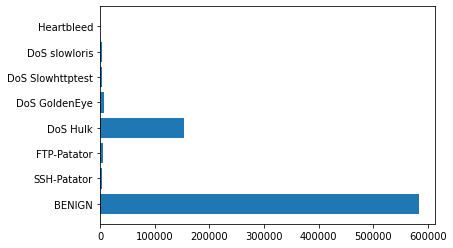

In [ ]:
plt.barh(labelsg,count)

**Pie Chart**

([<matplotlib.patches.Wedge at 0x7f95d0ef74f0>,
 [Text(-0.8169557368007543, 0.7366025550514584, 'BENIGN'),
  Text(0.1312953087237948, -1.0921362286395977, 'SSH-Patator'),
  Text(0.17292882641165896, -1.0863220613592852, 'FTP-Patator'),
  Text(0.8009647895048346, -0.7539598172140716, 'DoS Hulk'),
  Text(1.0954575333296528, -0.09986387070063445, 'DoS GoldenEye'),
  Text(1.0987706572332852, -0.051990795369322766, 'DoS Slowhttptest'),
  Text(1.099857825377154, -0.017685133774946734, 'DoS slowloris'),
  Text(1.0999999994065648, -3.613249791437634e-05, 'Heartbleed')],
 [Text(-0.44561222007313867, 0.40178321184625, '76.6%'),
  Text(0.0716156229402517, -0.5957106701670533, '0.5%'),
  Text(0.09432481440635943, -0.5925393061959736, '0.7%'),
  Text(0.4368898851844552, -0.41125080938949354, '20.2%'),
  Text(0.5975222909070832, -0.05447120220034606, '0.9%'),
  Text(0.5993294493999737, -0.02835861565599423, '0.5%'),
  Text(0.5999224502057203, -0.009646436604516398, '0.5%'),
  Text(0.599999999676308,

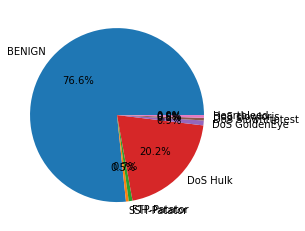

In [ ]:
plt.pie(count,labels=labelsg, autopct='%1.1f%%')

**Correlation Plot**

In [ ]:
correlation_matrix=data_clean.corr()

In [ ]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Destination Port,1.000000,-0.190847,-0.004003,-0.003813,0.003409,-0.003018,-0.001545,-0.118817,0.045264,0.032119,-0.207527,-0.223170,-0.229941,-0.191226,0.074473,0.192184,-0.127136,-0.159405,-0.162483,-0.021240,-0.188799,-0.128686,-0.149853,-0.161549,-0.047220,-0.124774,-0.077827,-0.070466,-0.087753,-0.046764,0.209082,0.000527,0.000862,0.175726,0.168816,-0.207950,-0.180029,-0.194886,-0.178277,-0.130663,-0.057311,0.209082,-0.006869,-0.189960,0.480038,0.496918,-0.006687,-0.038424,-0.196067,0.045264,-0.229941,0.000527,-0.004003,0.003409,-0.003813,-0.003018,-0.105776,0.237203,-0.002713,0.000932,-0.047882,-0.041845,-0.057620,-0.036969,-0.156410,-0.033049,-0.157932,-0.153660
Flow Duration,-0.190847,1.000000,0.017785,0.016724,0.081169,0.014470,0.318505,-0.174866,0.144916,0.306117,0.667742,-0.278727,0.642733,0.639108,-0.031809,-0.156743,0.583151,0.808459,0.840999,0.056325,0.999074,0.606378,0.794360,0.840819,0.172579,0.735676,0.402537,0.510468,0.557197,0.176955,-0.048234,0.000684,-0.001031,-0.150072,-0.078719,-0.275936,0.678689,0.620041,0.662841,0.547316,0.285702,-0.048234,0.004793,0.172655,0.050538,-0.157905,0.004744,-0.163755,0.606375,0.144916,0.642733,0.000684,0.017785,0.081169,0.016724,0.014469,0.060133,-0.052407,0.012410,-0.000243,0.142428,0.211100,0.236821,0.074384,0.828882,0.188127,0.837819,0.813056
Total Fwd Packets,-0.004003,0.017785,1.000000,0.999533,0.502726,0.998100,0.009956,-0.003776,-0.000369,0.001468,0.022265,-0.005717,0.019275,0.005441,0.000372,-0.002833,-0.001707,-0.001577,0.000073,-0.000605,0.017712,-0.001789,-0.001221,-0.000000,-0.001244,0.022395,-0.001046,-0.000335,0.001217,-0.001053,0.003674,0.000134,0.009138,-0.002731,-0.001258,-0.006020,0.022139,0.023583,0.011399,0.006265,-0.001910,0.003674,0.000116,0.008407,0.001203,-0.003457,0.000115,0.003045,0.021562,-0.000369,0.019275,0.000134,1.000000,0.502726,0.999533,0.998088,0.003883,-0.000660,0.799402,-0.000129,0.009266,0.006563,0.010105,0.007547,-0.000346,0.000774,-0.000260,-0.000446
Total Backward Packets,-0.003813,0.016724,0.999533,1.000000,0.499820,0.997932,0.009421,-0.003410,-0.000883,0.000918,0.021988,-0.004967,0.019201,0.004981,0.000307,-0.002956,-0.002034,-0.002019,-0.000393,-0.000626,0.016643,-0.001948,-0.001653,-0.000472,-0.001119,0.021902,-0.001219,-0.000449,0.001280,-0.001054,0.003549,0.000473,0.009142,-0.002884,-0.001008,-0.005417,0.021787,0.023806,0.011077,0.005994,-0.001692,0.003549,0.000022,0.007745,0.000936,-0.002958,0.000021,0.005327,0.021791,-0.000883,0.019201,0.000473,0.999533,0.499820,1.000000,0.997929,0.003551,-0.000620,0.795470,0.000023,0.008475,0.004960,0.008606,0.007634,-0.000748,0.000401,-0.000714,-0.000810
Total Length of Fwd Packets,0.003409,0.081169,0.502726,0.499820,1.000000,0.488467,0.343874,-0.007665,0.298268,0.269384,0.036377,-0.038028,0.029732,0.018509,0.004960,-0.021766,0.002748,0.013077,0.023388,-0.004576,0.080151,0.002304,0.

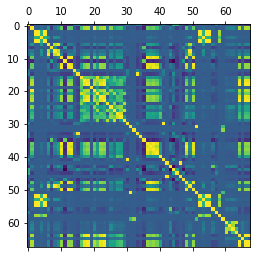

In [ ]:
plt.matshow(correlation_matrix)

We found the pairs of columns that are highly correlated, with each pair appearing only once in the list. From this list, we develop a correlation matrix where the subset includes only the rows and columns that are involved in highly correlated pairs. This correlation matrix will allow us to analyze the most important relationships and reduce visual clutter: 

In [ ]:
pairplot_correlated_data = []
correlated_pairs = [] 
rows_with_correlated_pairs = []
columns_with_correlated_pairs = []
correlation_matrix.index
for columns in correlation_matrix.index:
  counter=0
  for content in correlation_matrix[columns]:
    if(content>=0.9) or (content<=-0.9):
      if correlation_matrix.index[counter] not in pairplot_correlated_data:
        pairplot_correlated_data.append(correlation_matrix.index[counter])
      if columns not in pairplot_correlated_data:
        pairplot_correlated_data.append(columns)
      if [correlation_matrix.index[counter],columns] not in correlated_pairs and [columns,correlation_matrix.index[counter]] not in correlated_pairs and correlation_matrix.index[counter] != columns:
        correlated_pairs.append([correlation_matrix.index[counter],columns])
        if correlation_matrix.index[counter] not in rows_with_correlated_pairs:
          rows_with_correlated_pairs.append(correlation_matrix.index[counter])
        if columns not in columns_with_correlated_pairs:
          columns_with_correlated_pairs.append(columns)
    counter = counter + 1
print(correlated_pairs)
print(pairplot_correlated_data)

[['Fwd IAT Total', ' Flow Duration'], [' Total Backward Packets', ' Total Fwd Packets'], [' Total Length of Bwd Packets', ' Total Fwd Packets'], ['Subflow Fwd Packets', ' Total Fwd Packets'], [' Subflow Bwd Packets', ' Total Fwd Packets'], [' Subflow Bwd Bytes', ' Total Fwd Packets'], [' Total Length of Bwd Packets', ' Total Backward Packets'], ['Subflow Fwd Packets', ' Total Backward Packets'], [' Subflow Bwd Packets', ' Total Backward Packets'], [' Subflow Bwd Bytes', ' Total Backward Packets'], [' Subflow Fwd Bytes', 'Total Length of Fwd Packets'], ['Subflow Fwd Packets', ' Total Length of Bwd Packets'], [' Subflow Bwd Packets', ' Total Length of Bwd Packets'], [' Subflow Bwd Bytes', ' Total Length of Bwd Packets'], [' Fwd Packet Length Std', ' Fwd Packet Length Max'], [' Avg Fwd Segment Size', ' Fwd Packet Length Mean'], [' Bwd Packet Length Mean', 'Bwd Packet Length Max'], [' Bwd Packet Length Std', 'Bwd Packet Length Max'], [' Max Packet Length', 'Bwd Packet Length Max'], [' Pack

In [ ]:
correlation_matrix_with_correlated_pairs=correlation_matrix[columns_with_correlated_pairs].loc[rows_with_correlated_pairs].style.background_gradient(cmap='coolwarm')
correlation_matrix_with_correlated_pairs

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Fwd IAT Std,Fwd IAT Max,Bwd IAT Std,Fwd PSH Flags,Fwd Header Length,Max Packet Length,Packet Length Mean,Packet Length Std,RST Flag Count,Average Packet Size,Subflow Fwd Packets,Subflow Bwd Packets,Idle Mean,Idle Max
Fwd IAT Total,0.999074,0.017712,0.016643,0.080151,0.014427,0.313698,0.142192,0.665255,0.640630,0.636802,-0.154905,0.583348,0.809070,0.841682,0.796144,0.842862,0.509096,-0.047000,0.000673,0.676080,0.617335,0.660329,0.004363,0.603908,0.017712,0.016643,0.830151,0.839035
Total Backward Packets,0.016724,0.999533,1.000000,0.499820,0.997932,0.009421,-0.000883,0.021988,0.019201,0.004981,-0.002956,-0.002034,-0.002019,-0.000393,-0.001653,-0.000472,-0.000449,0.003549,0.000473,0.021787,0.023806,0.011077,0.000022,0.021791,0.999533,1.000000,-0.000748,-0.000714
Total Length of Bwd Packets,0.014470,0.998100,0.997932,0.488467,1.000000,0.006888,-0.001931,0.021619,0.018695,0.005037,-0.002162,-0.001807,-0.001766,-0.000425,-0.001410,-0.000489,-0.000891,0.003492,0.000468,0.021211,0.022694,0.010685,-0.000037,0.020839,0.998100,0.997932,-0.000731,-0.000724
Subflow Fwd Packets,0.017785,1.000000,0.999533,0.502726,0.998100,0.009956,-0.000369,0.022265,0.019275,0.005441,-0.002833,-0.001707,-0.001577,0.000073,-0.001221,-0.000000,-0.000335,0.003674,0.000134,0.022139,0.023583,0.011399,0.000116,0.021562,1.000000,0.999533,-0.000346,-0.000260
Subflow Bwd Packets,0.016724,0.999533,1.000000,0.499820,0.997932,0.009421,-0.000883,0.021988,0.019201,0.004981,-0.002956,-0.002034,-0.002019,-0.000393,-0.001653,-0.000472,-0.000449,0.003549,0.000473,0.021787,0.023806,0.011077,0.000022,0.021791,0.999533,1.000000,-0.000748,-0.000714
Subflow Bwd Bytes,0.014469,0.998088,0.997929,0.488417,1.000000,0.006890,-0.001931,0.021620,0.018695,0.005037,-0.002162,-0.001807,-0.001766,-0.000426,-0.001410,-0.000489,-0.000891,0.003489,0.000468,0.021211,0.022694,0.010685,-0.000037,0.020839,0.998088,0.997929,-0.000731,-0.000724
Subflow Fwd Bytes,0.081169,0.502726,0.499820,1.000000,0.488467,0.343874,0.298268,0.036377,0.029732,0.018509,-0.021766,0.002748,0.013077,0.023388,0.016949,0.022827,0.037464,0.009626,-0.002589,0.099248,0.110630,0.074319,0.008360,0.104343,0.502726,0.499820,0.020579,0.021967
Fwd Packet Length Std,0.306117,0.001468,0.000918,0.269384,-0.000725,0.955144,0.865819,0.226455,0.205205,0.220097,-0.074912,0.112338,0.220401,0.247825,0.255389,0.245337,0.282185,0.008085,0.000574,0.395056,0.404716,0.393729,0.025951,0.402869,0.001468,0.000918,0.245287,0.244977
Avg Fwd Segment Size,0.144916,-0.000369,-0.000883,0.298268,-0.001931,0.841244,1.000000,0.068028,0.057911,0.065667,-0.074190,0.056138,0.114661,0.128056,0.127735,0.126497,0.212650,0.029055,-0.000109,0.237884,0.314465,0.244801,0.020546,0.325434,-0.000369,-0.000883,0.125048,0.125961
Bwd Packet Length Mean,0.642733,0.019275,0.019201,0.029732,0.018695,0.184691,0.057911,0.959098,1.000000,0.945418,-0.169612,0.339859,0.676322,0.760227,0.774582,0.758813,0.325366,-0.124608,0.000998,0.937044,0.941526,0.953442,0.004525,0.934991,0.019275,0.019201,0.765683,0.762031


**Heatmap**

<AxesSubplot:>

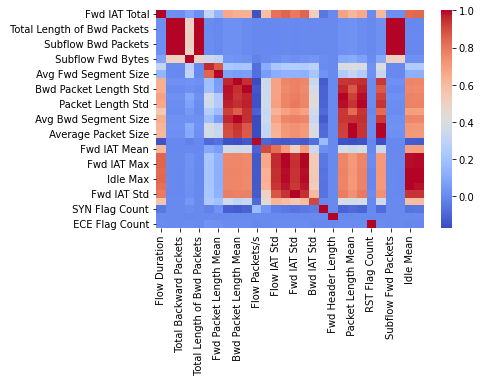

In [ ]:
correlation_visualization=correlation_matrix[columns_with_correlated_pairs].loc[rows_with_correlated_pairs]
sns.heatmap(correlation_visualization, cmap='coolwarm')

**Pairplot**

In [ ]:
df_subset = correlation_matrix[pairplot_correlated_data]
sns.set(font_scale=1.5)
sns.pairplot(df_subset)

**Data scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(X)

# **Model**

**Data Resampling and Model selection**

In [ ]:
# Model Development
logreg= LogisticRegression(penalty = "l2", solver = 'sag', max_iter = 100, multi_class = 'auto')

Accuracy with non-scaled values

In [ ]:
## Stratified K-Fold CV #using standard scale and minmax scaling
stratifiedkf = StratifiedKFold(n_splits=10) #10 fold crossvalidation was chosen because it requires the smallest computational complexity
score= cross_val_score(logreg,X,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was rea

Cross Validation Scores are [0.87595983 0.87544792 0.87548567 0.85049354 0.87405492 0.8668093
 0.86452536 0.86445973 0.86473538 0.86550982]
Average Cross Validation score :0.8677481473698447


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


By standard scaling the data, the accuracy improves to 0.95

In [ ]:
## Stratified K-Fold CV #using standard scale
stratifiedkf = StratifiedKFold(n_splits=10) #10 fold crossvalidation was chosen because it requires the smallest computational complexity
score= cross_val_score(logreg,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was rea

Cross Validation Scores are [0.94350594 0.94198333 0.94645857 0.93984301 0.94329518 0.96255119
 0.96232805 0.96161924 0.96133046 0.96190801]
Average Cross Validation score :0.952482298790731


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Using Min-Max Scaler, the obtained accuracy is of 0.96. Therefore, the data used for the following calculations is normalized_data

In [ ]:
## Stratified K-Fold CV #using standard scale
stratifiedkf = StratifiedKFold(n_splits=10) #10 fold crossvalidation was chosen because it requires the smallest computational complexity
score= cross_val_score(logreg,normalized_data,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Cross Validation Scores are [0.95995275 0.95941458 0.96122545 0.96000473 0.95928279 0.96571459
 0.96576709 0.96546519 0.96453324 0.96522892]
Average Cross Validation score :0.9626589318395864


**Data Splitting**

In [ ]:
## Splitting the data into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(normalized_data,y,test_size=0.20,random_state=0) #0.25 chosen 

In [ ]:
## Fitting the data into the model
logreg.fit(X_train,y_train)

LogisticRegression(solver='sag')

**Prediction using test data from data splitting**

In [ ]:
## Predicting y values for testing data
y_pred=logreg.predict(X_test)

**Confusion matrix**

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[114312,     60,   2283,     60,      0,      2,      0,      1],
       [   209,   1229,      0,      0,      1,      0,      0,      0],
       [  1108,      4,  29748,      0,      4,      0,      0,      0],
       [   124,      0,     13,    559,     18,      0,      0,      0],
       [   381,      0,      2,     14,    418,      0,      0,      0],
       [   533,      0,      2,      0,      0,    506,      0,      0],
       [     2,      0,      1,      0,      0,      0,      0,      0],
       [   775,      0,      0,      0,      0,      0,      0,      0]])

Text(0.5, 257.44, 'Predicted label')

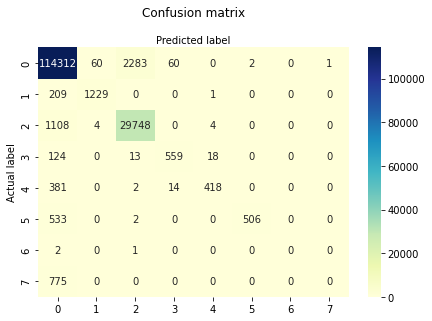

In [ ]:
## Visualizing the Confusion matrix using Seaborn Heatmap
class_names=['BENIGN','SSH-Patator','FTP-Patator','DoS Hulk','DoS GoldenEye','DoS Slowhttptest','DoS slowloris','Heartbleed'] # name  of classes
fig, ax = plt.subplots()
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**ROC Curve**

In [ ]:
n_classes = len(np.unique(y_train))

In [ ]:
n_classes

8

In [ ]:
## y-pred was not able to provide any prediction for heartbleed, hence different dimensions were obtained for dummy variables

if 'Heartbleed' not in y_pred:
    y_testb = np.append(y_test, 'Heartbleed')
    y_predb = np.append(y_pred, 'Heartbleed')

In [ ]:
Counter(y_testb)

Counter({'DoS Hulk': 30864,
         'BENIGN': 116718,
         'DoS Slowhttptest': 714,
         'DoS GoldenEye': 1439,
         'SSH-Patator': 775,
         'FTP-Patator': 1041,
         'DoS slowloris': 815,
         'Heartbleed': 4})

In [ ]:
Counter(y_predb)

Counter({'DoS Hulk': 32049,
         'BENIGN': 117444,
         'DoS Slowhttptest': 633,
         'DoS GoldenEye': 1293,
         'DoS slowloris': 441,
         'FTP-Patator': 508,
         'SSH-Patator': 1,
         'Heartbleed': 1})

In [ ]:
y_test_d = pd.get_dummies(y_testb, drop_first=False).values
print(y_test_d)

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
y_pred_d = pd.get_dummies(y_predb, drop_first=False).values
y_pred_d

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [ ]:
print(y_test_d.shape)
print(y_pred_d.shape)

(152370, 8)
(152370, 8)


In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 8 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_d[:, i], y_pred_d[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_d.ravel(), y_pred_d.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-197-25fe9c454451>:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


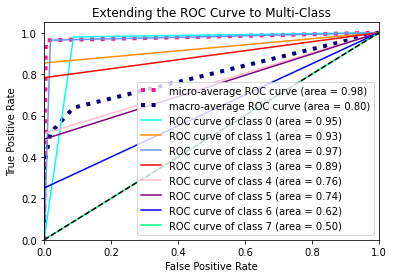

In [ ]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'pink', 'purple', 'blue', 'springgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

**Performance metrics**

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9632668062401144


In [ ]:
print("Precision:", precision_score(y_test, y_pred, average = "micro"))

Precision: 0.9632668062401144


In [ ]:
print("Precision:", precision_score(y_test, y_pred, average = "macro"))

Precision: 0.7098804411988826


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Recall:", recall_score(y_test, y_pred, average = "micro"))

Recall: 0.9632668062401144


In [ ]:
print("Recall:", recall_score(y_test, y_pred, average = "macro"))

Recall: 0.5723950738741164


# **Applying code on Test Data provided**

**Data Preprocessing**

In [ ]:
## Upload test data
uploaded = files.upload()

Saving Cyberattack_Detection_Test.csv to Cyberattack_Detection_Test.csv


In [ ]:
df_test = pd.read_csv("Cyberattack_Detection_Test.csv")
df_test

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,443.0,61029065.0,14.0,13.0,1239.0,3587.0,911.0,0.0,88.500000,244.094480,...,9.0,20.0,75788.50000,61268.33706,200851.0,50567.0,10000000.0,5030.528428,10000000.0,9997094.0
1,53.0,193.0,2.0,2.0,90.0,158.0,45.0,45.0,45.000000,0.000000,...,1.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,443.0,327274.0,10.0,7.0,532.0,3548.0,195.0,0.0,53.200000,80.938660,...,4.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,80.0,108891.0,3.0,4.0,438.0,860.0,438.0,0.0,146.000000,252.879418,...,1.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
4,53.0,427.0,1.0,1.0,54.0,114.0,54.0,54.0,54.000000,0.000000,...,0.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123843,443.0,115407519.0,21.0,18.0,1088.0,4663.0,700.0,0.0,51.809524,157.933726,...,4.0,32.0,50585.18182,45761.43725,188560.0,36593.0,10000000.0,4572.337463,10000000.0,9999088.0
123844,80.0,150753.0,3.0,7.0,331.0,11595.0,331.0,0.0,110.333333,191.102939,...,1.0,32.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
123845,443.0,4243087.0,5.0,1.0,135.0,46.0,46.0,6.0,27.000000,20.124612,...,4.0,20.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
123846,443.0,117713460.0,17.0,17.0,837.0,15775.0,226.0,0.0,49.235294,76.994748,...,7.0,32.0,94325.50000,50092.15149,129746.0,58905.0,58800000.0,265476.169900,58900000.0,58600000.0


In [ ]:
## Check for NaN Columns
for NaN_columns in df_test.columns:
  if all([ value == 0 for value in df_test[NaN_columns]  ]) :
    print(NaN_columns)

 Bwd PSH Flags
 Fwd URG Flags
 Bwd URG Flags
 CWE Flag Count
Fwd Avg Bytes/Bulk
 Fwd Avg Packets/Bulk
 Fwd Avg Bulk Rate
 Bwd Avg Bytes/Bulk
 Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


We dropped the same columns that were dropped for the training data, to keep the dimension of the data set consistent.

In [ ]:
df_test=df_test.drop(' Bwd PSH Flags',axis=1)
df_test=df_test.drop(' Fwd URG Flags',axis=1)
df_test=df_test.drop(' Bwd URG Flags',axis=1)
df_test=df_test.drop(' CWE Flag Count',axis=1)
df_test=df_test.drop('Fwd Avg Bytes/Bulk',axis=1)
df_test=df_test.drop(' Fwd Avg Packets/Bulk',axis=1)
df_test=df_test.drop(' Fwd Avg Bulk Rate',axis=1)
df_test=df_test.drop(' Bwd Avg Bytes/Bulk',axis=1)
df_test=df_test.drop(' Bwd Avg Packets/Bulk',axis=1)
df_test=df_test.drop('Bwd Avg Bulk Rate',axis=1)

In [ ]:
## Checking for NaN Values
nan_count = df_test.isna().sum().sum()
print(nan_count)

0


In [ ]:
# Only use if the number of Nan Values is >0
df_test.dropna(inplace=True)

In [ ]:
## Cleaning data set
df_tclean=clean_dataset(df_test)

In [ ]:
## Scale the data using Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df_tclean = scaler.fit_transform(df_tclean)

**Predicting using Test Data provided**

In [ ]:
## Predicting y values for testing data
y_hat=logreg.predict(normalized_df_tclean)

In [ ]:
## Downloading y-values as csv
y_csv=pd.DataFrame(y_hat)
y_csv.to_csv(r'PredictedYhat.csv',index=False,header=True)